# Sales Data

In [1]:
import pandas as pd
import os


**Mergin 12 months of sales data in a single .csv file**

In [2]:
df = pd.read_csv("SalesAnalysis/Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('SalesAnalysis/Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("SalesAnalysis/Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data,df])

all_months_data.to_csv("all_data.csv", index=False)

**Read in updated dataframes**

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Augment data with additional columns

**Cleaning rows with NaN's**

In [4]:
all_data = all_data.dropna(how = 'all')

In [5]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [6]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int64')
all_data.head()

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

**Adding sales column**

In [7]:
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4,99.99
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,1700.00
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4,11.99


# What was the best month for sale?

In [8]:
all_data.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


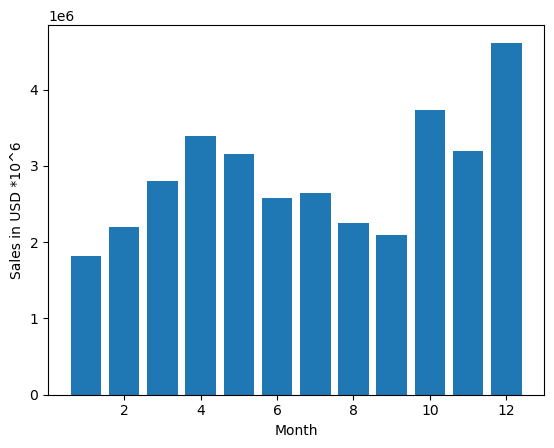

In [9]:
import matplotlib.pyplot as plt

months = range(1,13,1)
results = all_data.groupby('Month').sum()

plt.bar(months, results['Sales'])
plt.ylabel('Sales in USD *10^6')
plt.xlabel('Month')
plt.show()

# Which city had the highest number of sales?

In [10]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x : x.split(',')[1])
all_data.drop(columns = 'City', inplace = True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [11]:
cities = all_data['City'].unique()
results = all_data.groupby('City').sum()

plt.bar(cities, results['Sales'])

plt.xticks(cities, rotation='vertical', size=8)
plt.xlabel('CityName')
plt.ylabel('Sales in USD')
plt.show()

KeyError: 'City'

# What time should we display the advertisement to maximize likelihood of customer's buying prodct?

In [ ]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [ ]:
all_data

In [ ]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minutes'] = all_data['Order Date'].dt.minute
all_data

In [ ]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.show()

# Which products are sold the most togather?


In [ ]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

In [ ]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count:
    print(key+","+value)


# Which product was sold the most?

In [ ]:
all_data.head()

In [ ]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)

plt.xlabel('Product')
plt.ylabel('Number of products sold')

plt.xticks(products, rotation='vertical', size=8)
plt.show()

# Thanks